# **Spit some [tensor] flow**

Let's see some classifiers in action

`Leggo`

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Visualising the results
def plot_model(classifier, X_set, y_set, y_test, y_pred, text):
  from sklearn.metrics import accuracy_score
  print("===== Accuracy Score =====")
  print(accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print("===== Accuracy Score =====")
  class_report = classification_report(y_test, y_pred)
  print(class_report)
  
  from matplotlib.colors import ListedColormap
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('pink', 'cyan', 'lightgreen')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue', 'green'))(i), label = j)
  plt.title(text)
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend()
  plt.show()

## Get Breast Cancer Dataset

In [0]:
from sklearn.datasets import load_wine
data = load_wine()

In [21]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [0]:
X = data.data
y = data.target

In [23]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [26]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_


array([0.99844833, 0.00155167])

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


===== Accuracy Score =====
0.5
===== Accuracy Score =====
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.42      0.71      0.53         7
           2       0.00      0.00      0.00         7

    accuracy                           0.50        18
   macro avg       0.41      0.57      0.47        18
weighted avg       0.34      0.50      0.40        18



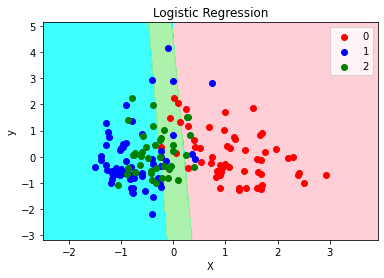

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "Logistic Regression")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedenc

===== Accuracy Score =====
0.5555555555555556
===== Accuracy Score =====
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.46      0.86      0.60         7
           2       0.00      0.00      0.00         7

    accuracy                           0.56        18
   macro avg       0.42      0.62      0.50        18
weighted avg       0.36      0.56      0.43        18



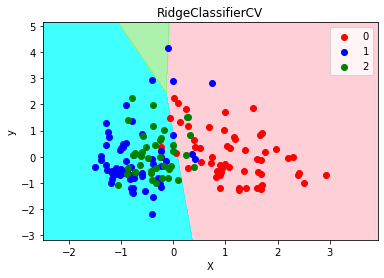

In [30]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "RidgeClassifierCV")

===== Accuracy Score =====
0.7777777777777778
===== Accuracy Score =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.71      0.71      0.71         7
           2       0.71      0.71      0.71         7

    accuracy                           0.78        18
   macro avg       0.81      0.81      0.81        18
weighted avg       0.78      0.78      0.78        18



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


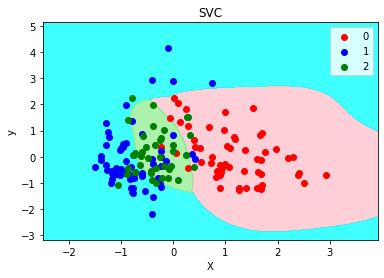

In [31]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "SVC")

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


===== Accuracy Score =====
0.6666666666666666
===== Accuracy Score =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.55      0.86      0.67         7
           2       0.67      0.29      0.40         7

    accuracy                           0.67        18
   macro avg       0.74      0.71      0.69        18
weighted avg       0.69      0.67      0.64        18



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


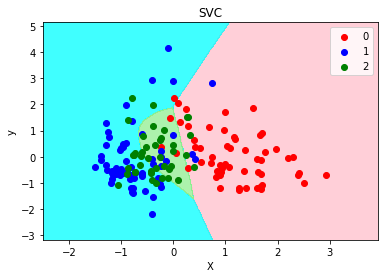

In [32]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "SVC")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedenc

===== Accuracy Score =====
0.5555555555555556
===== Accuracy Score =====
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.46      0.86      0.60         7
           2       0.00      0.00      0.00         7

    accuracy                           0.56        18
   macro avg       0.42      0.62      0.50        18
weighted avg       0.36      0.56      0.43        18



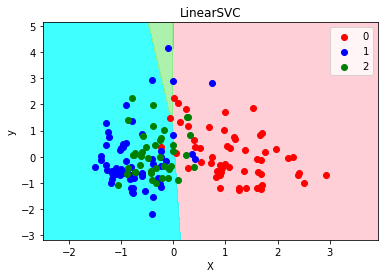

In [33]:
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "LinearSVC")

===== Accuracy Score =====
0.7222222222222222
===== Accuracy Score =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.67      0.57      0.62         7
           2       0.62      0.71      0.67         7

    accuracy                           0.72        18
   macro avg       0.76      0.76      0.76        18
weighted avg       0.72      0.72      0.72        18



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


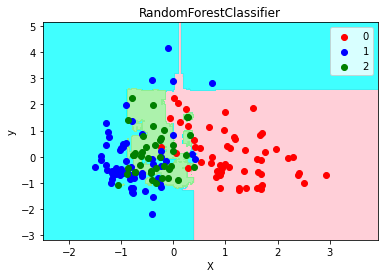

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "RandomForestClassifier")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


===== Accuracy Score =====
0.6666666666666666
===== Accuracy Score =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.60      0.43      0.50         7
           2       0.56      0.71      0.63         7

    accuracy                           0.67        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.67      0.67      0.66        18



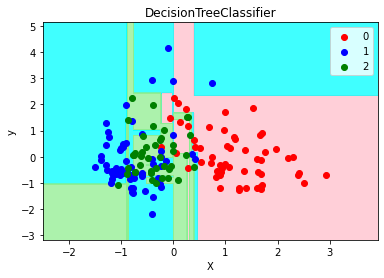

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "DecisionTreeClassifier")

===== Accuracy Score =====
0.7222222222222222
===== Accuracy Score =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.67      0.57      0.62         7
           2       0.62      0.71      0.67         7

    accuracy                           0.72        18
   macro avg       0.76      0.76      0.76        18
weighted avg       0.72      0.72      0.72        18



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


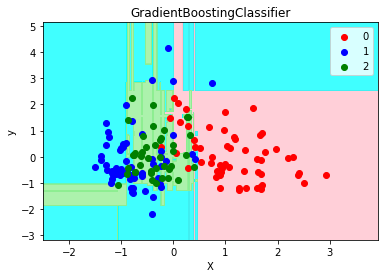

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "GradientBoostingClassifier")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedenc

===== Accuracy Score =====
0.5555555555555556
===== Accuracy Score =====
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.46      0.86      0.60         7
           2       0.00      0.00      0.00         7

    accuracy                           0.56        18
   macro avg       0.42      0.62      0.50        18
weighted avg       0.36      0.56      0.43        18



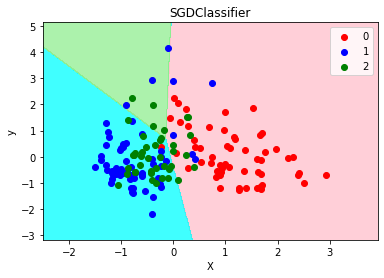

In [37]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "SGDClassifier")

===== Accuracy Score =====
0.7222222222222222
===== Accuracy Score =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.67      0.57      0.62         7
           2       0.62      0.71      0.67         7

    accuracy                           0.72        18
   macro avg       0.76      0.76      0.76        18
weighted avg       0.72      0.72      0.72        18



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


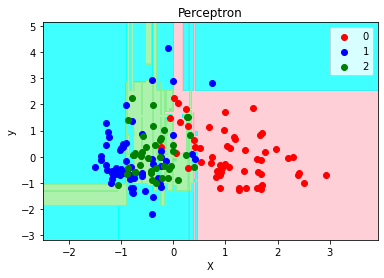

In [38]:
from sklearn.linear_model import Perceptron
classifier = GradientBoostingClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "Perceptron")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


===== Accuracy Score =====
0.6666666666666666
===== Accuracy Score =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.56      0.71      0.63         7
           2       0.60      0.43      0.50         7

    accuracy                           0.67        18
   macro avg       0.72      0.71      0.71        18
weighted avg       0.67      0.67      0.66        18



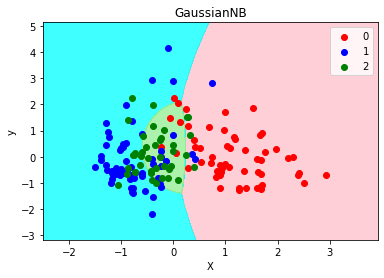

In [39]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "GaussianNB")

===== Accuracy Score =====
0.6111111111111112
===== Accuracy Score =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      0.57      0.53         7
           2       0.50      0.43      0.46         7

    accuracy                           0.61        18
   macro avg       0.67      0.67      0.66        18
weighted avg       0.61      0.61      0.61        18



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


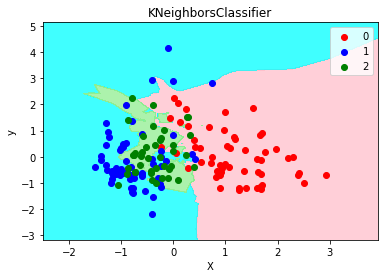

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred).flatten()
plot_model(classifier, X_train, y_train, y_test, y_pred, "KNeighborsClassifier")